Theano 
===
An optimizing compiler for symbolic math expressions

In [2]:
import theano
import theano.tensor as T

WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


Symbolic variables
==========

In [18]:
x = T.scalar()

In [19]:
x

<TensorType(float32, scalar)>

Variables can be used in expressions

In [20]:
y = 3*(x**2) + 1

Result is symbolic as well

In [21]:
type(y)

theano.tensor.var.TensorVariable

Investigating expressions

In [22]:
print(y)

Elemwise{add,no_inplace}.0


In [23]:
theano.pprint(y)

'((TensorConstant{3} * (<TensorType(float32, scalar)> ** TensorConstant{2})) + TensorConstant{1})'

In [24]:
theano.printing.debugprint(y)

Elemwise{add,no_inplace} [@A] ''   
 |Elemwise{mul,no_inplace} [@B] ''   
 | |TensorConstant{3} [@C]
 | |Elemwise{pow,no_inplace} [@D] ''   
 |   |<TensorType(float32, scalar)> [@E]
 |   |TensorConstant{2} [@F]
 |TensorConstant{1} [@G]


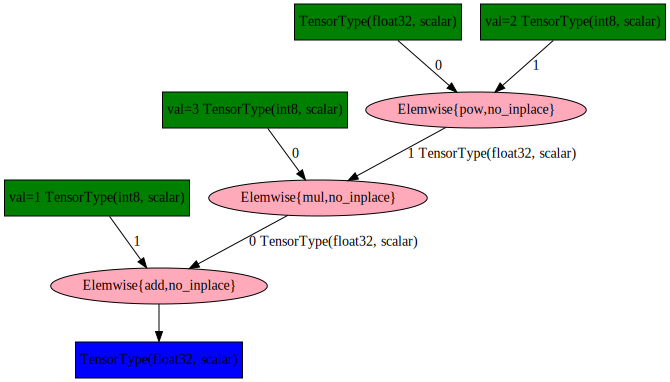

In [25]:
from IPython.display import SVG
SVG(theano.printing.pydotprint(y, return_image=True, format='svg'))

Evaluating expressions
============

Supply a `dict` mapping variables to values

In [26]:
y.eval({x: 2})

array(13.0, dtype=float32)

Or compile a function

In [27]:
f = theano.function([x], y)

In [28]:
f(2)

array(13.0, dtype=float32)

Compiled function has been transformed

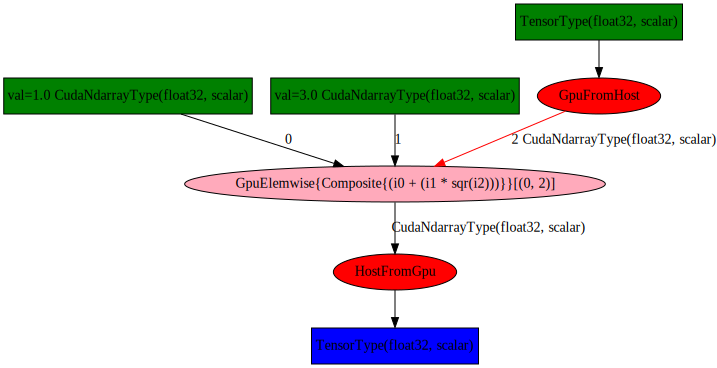

In [29]:
SVG(theano.printing.pydotprint(f, return_image=True, format='svg'))

Other tensor types
==========

In [30]:
X = T.vector()
X = T.matrix()
X = T.tensor3()
X = T.tensor4()

Numpy style indexing
===========

In [31]:
X = T.vector()

In [32]:
X[1:-1:2]

Subtensor{int64:int64:int64}.0

In [33]:
X[[1,2,3]]

AdvancedSubtensor1.0

Many functions/operations are available through `theano.tensor` or variable methods

In [34]:
y = X.argmax()

In [35]:
y = T.cosh(X)

In [36]:
y = T.outer(X, X)

But don't try to use numpy functions on Theano variables. Results may vary!

Automatic differention
============
- Gradients are free!

In [3]:
x = T.scalar()
y = T.log(x)

In [16]:
gradient = T.grad(y, x)
print gradient
print gradient.eval({x: 2})
print (2 * gradient)

Elemwise{true_div}.0
0.5
Elemwise{mul,no_inplace}.0


# Shared Variables

- Symbolic + Storage

In [39]:
import numpy as np
x = theano.shared(np.zeros((2, 3), dtype=theano.config.floatX))

In [40]:
x

<CudaNdarrayType(float32, matrix)>

We can get and set the variable's value

In [41]:
values = x.get_value()
print(values.shape)
print(values)

(2, 3)
[[ 0.  0.  0.]
 [ 0.  0.  0.]]


In [42]:
x.set_value(values)

Shared variables can be used in expressions as well

In [43]:
(x + 2) ** 2

Elemwise{pow,no_inplace}.0

Their value is used as input when evaluating

In [44]:
((x + 2) ** 2).eval()

array([[ 4.,  4.,  4.],
       [ 4.,  4.,  4.]], dtype=float32)

In [45]:
theano.function([], (x + 2) ** 2)()

array([[ 4.,  4.,  4.],
       [ 4.,  4.,  4.]], dtype=float32)

# Updates

- Store results of function evalution
- `dict` mapping shared variables to new values

In [46]:
count = theano.shared(0)
new_count = count + 1
updates = {count: new_count}

f = theano.function([], count, updates=updates)

In [47]:
f()

array(0)

In [48]:
f()

array(1)

In [49]:
f()

array(2)